# Missing Values

* **Missing Values** são valores faltantes em colunas. esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados. 
* Missing Values podem ser um problema em várias situações, como por exemplo, algoritmos de machine learning que não trabalham bem com dados faltantes.
* Estes também podem atrapalhar resultados de análises

In [1]:
import pandas as pd

In [2]:
data = 'kc_house_data.csv'
dataset = pd.read_csv(data, sep=',', header=0)

In [3]:
# Consultando linhas com valores faltantes.
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# Com este comando removemos todas as linhas onde tenha pelo menos um registro faltante em algum atributo.
dataset.dropna(inplace=True)

In [5]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# É possível ainda, remover somente linhas que estejam com valores faltantes em todas as colunas, veja:
dataset.dropna(how='all', inplace=True)

In [7]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Preenche com a media dos valores da coluna floors os valores null
dataset['floors'].fillna(dataset['floors'].mean(), inplace=True)

In [9]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# Preenche com uma constante os valores faltantes 
dataset['bedrooms'].fillna(1, inplace=True)

In [11]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Visualização de Dados

<IPython.core.display.Javascript object>


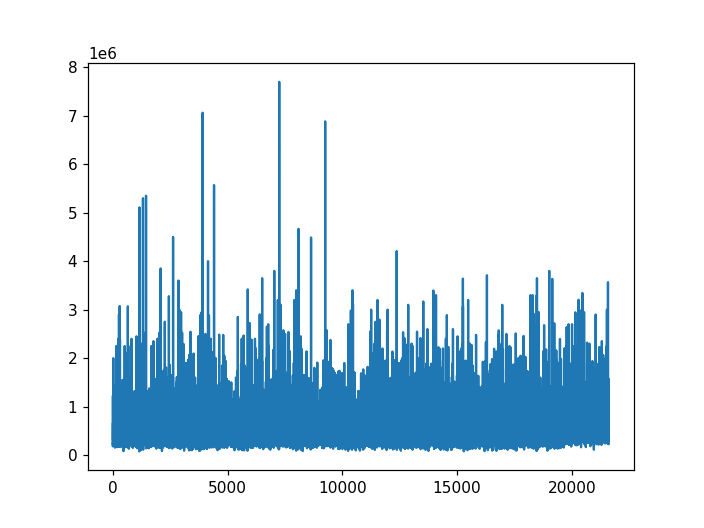

<AxesSubplot:>

In [12]:
# Plota em um grafico de barras o preço dos imóveis
%matplotlib notebook
dataset['price'].plot()

<IPython.core.display.Javascript object>


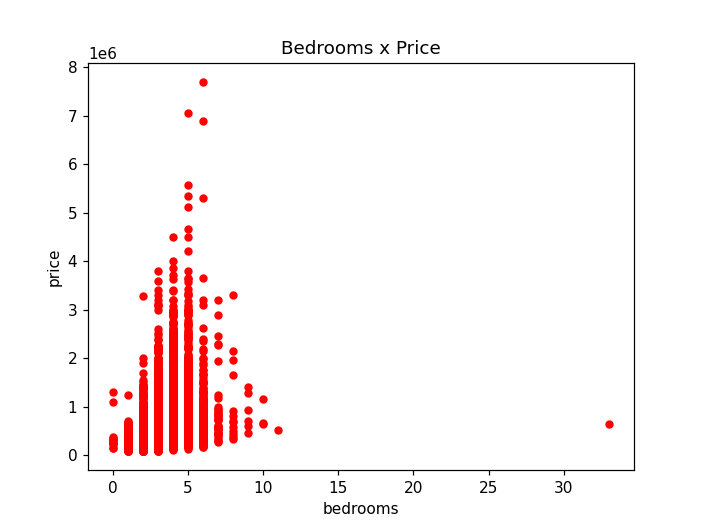

<AxesSubplot:title={'center':'Bedrooms x Price'}, xlabel='bedrooms', ylabel='price'>

In [13]:
dataset.plot(x='bedrooms', y='price', kind='scatter', title='Bedrooms x Price', color='r')

<IPython.core.display.Javascript object>


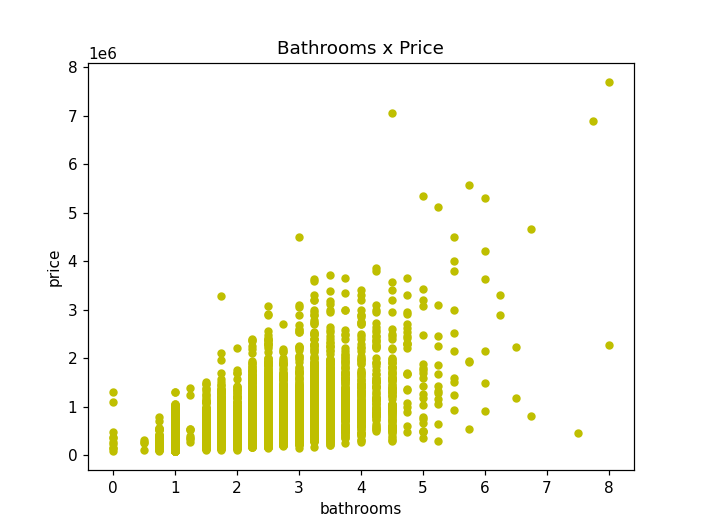

<AxesSubplot:title={'center':'Bathrooms x Price'}, xlabel='bathrooms', ylabel='price'>

In [14]:
dataset.plot(x='bathrooms', y='price', kind='scatter', title='Bathrooms x Price', color='y')

## Pandas 02

In [15]:
dataset = pd.read_csv(data, sep=',')

<IPython.core.display.Javascript object>


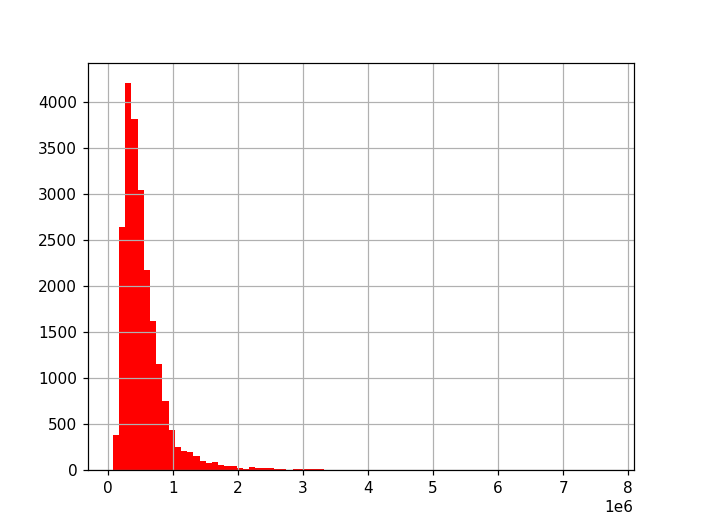

<AxesSubplot:>

In [16]:
# Plotando um histograma com a coluna price com 30 bins na cor vermelho
%matplotlib notebook
dataset['price'].hist(bins=80, color='red')

<IPython.core.display.Javascript object>


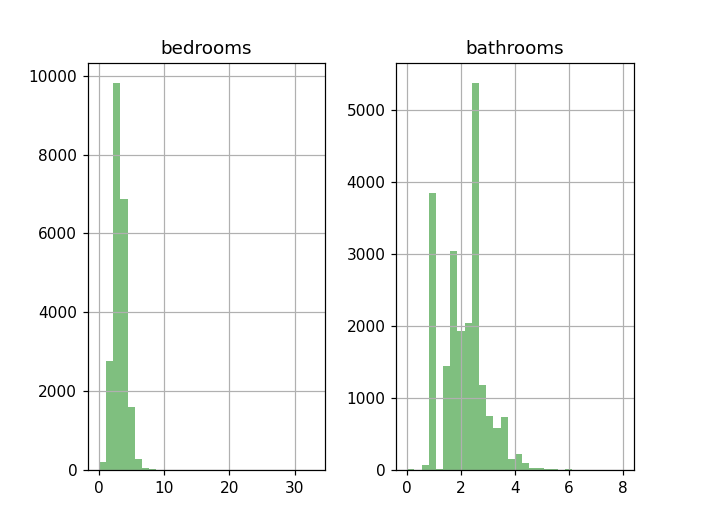

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>]], dtype=object)

In [17]:
%matplotlib notebook
dataset[['bedrooms', 'bathrooms']].hist(bins=30, alpha=0.5, color='Green')

## Estatística Descritiva

In [18]:
# Imprime o valor médio da coluna bedrooms
dataset['bedrooms'].mean()

3.3709102688694523

In [19]:
# Imprime o valor máximo da coluna bedrooms
dataset['bedrooms'].max()

33.0

In [20]:
# Imprime o valor mínimo da coluna bedrooms
dataset['bedrooms'].min()

0.0

In [21]:
# Imprime o desvio padrão da coluna bedrooms
dataset['bedrooms'].std()

0.9300844679400369

In [22]:
# Imprime a simetria da coluna (0 = simetrico > 0 assimétrico)
# Muito acima de 0 variação positiva em relação a média
# > 0 = maioria dos valores acima da média
# < 0 = maioria dos valores abaixo da média
dataset['bedrooms'].skew()

1.9744391609000942

In [23]:
dataset.skew()

id                0.243329
price             4.024069
bedrooms          1.974439
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616107
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

# Extraindo insights

**BoxPlot**
* São excelentes ferramentas de análise de dados, principalmente para identificar **outliers**
* Valores que excedem o valor minimo e máximo em um boxplot são considerados anomalias ou outliers.

In [24]:
import matplotlib

<IPython.core.display.Javascript object>


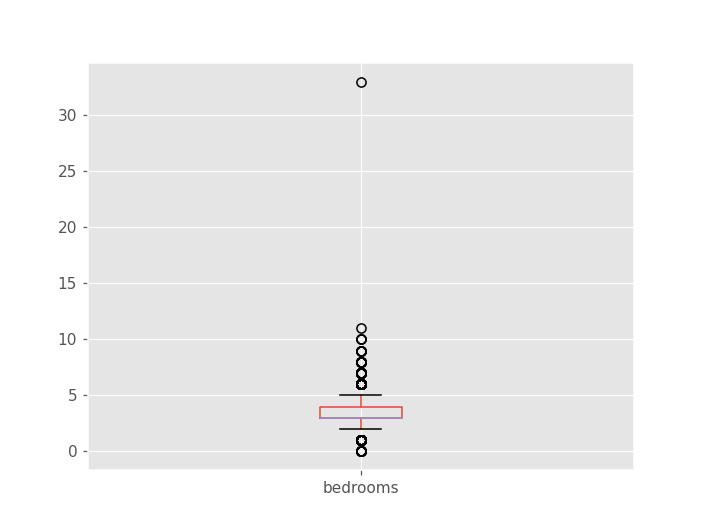

<AxesSubplot:>

In [25]:
%matplotlib notebook
matplotlib.style.use('ggplot')
dataset.boxplot(column='bedrooms')

In [26]:
# Visualizando os estivos de layout disponível
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


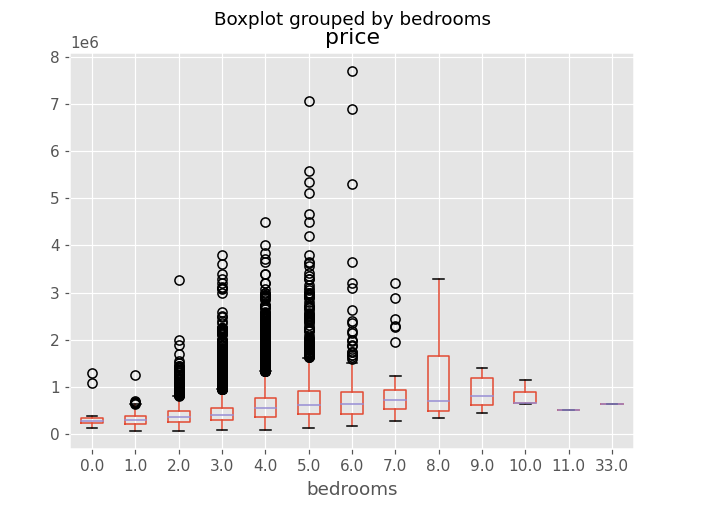

<AxesSubplot:title={'center':'price'}, xlabel='bedrooms'>

In [27]:
%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms')

In [28]:
# Imprime a correlação de todas as colunas do dataframe (person)
dataset.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001235,0.005160,-0.012258,-0.132109,0.018595,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308321,0.525138,0.702035,0.089661,0.256791,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001235,0.308321,1.000000,0.515929,0.576679,0.031684,0.175440,-0.006589,0.079515,0.028534,0.356972,0.477618,0.303078,0.154197,0.018827,-0.152706,-0.008963,0.129498,0.391670,0.029221
bathrooms,0.005160,0.525138,0.515929,1.000000,0.754665,0.087740,0.500626,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576679,0.754665,1.000000,0.172826,0.353922,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031684,0.087740,0.172826,1.000000,-0.005210,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018595,0.256791,0.175440,0.500626,0.353922,-0.005210,1.000000,0.023695,0.029432,-0.263740,0.458171,0.523863,-0.245708,0.489298,0.006330,-0.059093,0.049656,0.125399,0.279856,-0.011280
waterfront,-0.002721,0.266369,-0.006589,0.063744,0.103818,0.021604,0.023695,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079515,0.187737,0.284611,0.074710,0.029432,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028534,-0.124982,-0.058753,-0.008958,-0.263740,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [29]:
# Imprime a correlação de spearman (esta leva em consideração a correlação positiva e negativa)
dataset.corr('spearman')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.004178,0.006185,0.015051,0.001656,-0.116792,0.018905,-0.003573,0.012552,-0.023969,0.019835,0.003523,0.001408,0.026537,-0.017473,-0.005359,-0.003732,0.007413,-0.000035,-0.114735
price,0.004178,1.000000,0.344615,0.497160,0.644191,0.074939,0.322359,0.115089,0.293931,0.018490,0.658215,0.541752,0.251704,0.102038,0.101876,-0.008735,0.456409,0.063537,0.572290,0.062766
bedrooms,0.006185,0.344615,1.000000,0.521451,0.647395,0.216479,0.227565,-0.007604,0.081405,0.012748,0.380555,0.539755,0.230484,0.180037,0.016863,-0.167202,-0.021236,0.191430,0.443878,0.201530
bathrooms,0.015051,0.497160,0.521451,1.000000,0.745526,0.068805,0.546776,0.049522,0.155549,-0.162891,0.658194,0.691006,0.191848,0.566982,0.042688,-0.204783,0.008283,0.261539,0.570304,0.063111
sqft_living,0.001656,0.644191,0.647395,0.745526,1.000000,0.304159,0.401232,0.070326,0.232994,-0.062638,0.716400,0.843504,0.327878,0.352421,0.052679,-0.206848,0.030980,0.284584,0.746982,0.283864
sqft_lot,-0.116792,0.074939,0.216479,0.068805,0.304159,1.000000,-0.234460,0.085601,0.117033,0.114724,0.152049,0.272408,0.036624,-0.037569,0.008536,-0.319494,-0.122052,0.370551,0.359572,0.922316
floors,0.018905,0.322359,0.227565,0.546776,0.401232,-0.234460,1.000000,0.023876,0.019641,-0.287878,0.501672,0.599258,-0.272436,0.551660,0.012570,-0.061427,0.024616,0.148640,0.305398,-0.231411
waterfront,-0.003573,0.115089,-0.007604,0.049522,0.070326,0.085601,0.023876,1.000000,0.284924,0.016744,0.062189,0.054490,0.051969,-0.028605,0.091649,0.029591,-0.019044,-0.038139,0.074564,0.092271
view,0.012552,0.293931,0.081405,0.155549,0.232994,0.117033,0.019641,0.284924,1.000000,0.046000,0.217044,0.144394,0.236525,-0.066607,0.096539,0.078215,-0.000073,-0.102728,0.255793,0.116520
condition,-0.023969,0.018490,0.012748,-0.162891,-0.062638,0.114724,-0.287878,0.016744,0.046000,1.000000,-0.167374,-0.158126,0.161623,-0.393816,-0.066180,-0.022416,-0.022341,-0.085270,-0.086905,0.117719


In [30]:
# Imprime a correlação de algumas colunas
dataset[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'grade', 'price']].corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,price
bedrooms,1.000000,0.515929,0.576679,0.175440,-0.006589,0.356972,0.308321
bathrooms,0.515929,1.000000,0.754665,0.500626,0.063744,0.664983,0.525138
sqft_living,0.576679,0.754665,1.000000,0.353922,0.103818,0.762704,0.702035
floors,0.175440,0.500626,0.353922,1.000000,0.023695,0.458171,0.256791
waterfront,-0.006589,0.063744,0.103818,0.023695,1.000000,0.082775,0.266369
grade,0.356972,0.664983,0.762704,0.458171,0.082775,1.000000,0.667434
price,0.308321,0.525138,0.702035,0.256791,0.266369,0.667434,1.000000


<IPython.core.display.Javascript object>


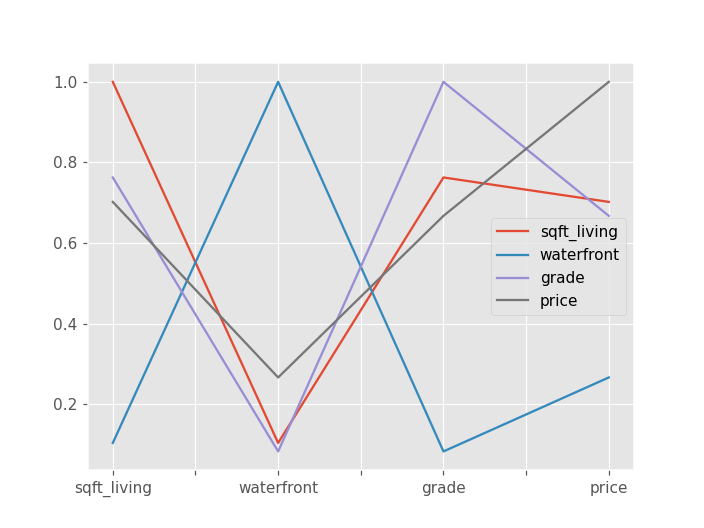

<AxesSubplot:>

In [31]:
%matplotlib notebook
dataset[['sqft_living', 'waterfront', 'grade', 'price']].corr().plot()

## Tabelas Pivot

* Uteis para fazer agrupamento de dados.
* Conta a quantidade de imóveis agrupados pelas colunas waterfront e floors.
* O parâmetro index informa as colunas que serão usadas para agregação.
* O parametro aggfunc é usado para definir a função de agregação, que poderia ser uma média por exemplo.
* O parametro margins=True calcula a quantidade total no final da tabela

* Muito interessante a performance dessa operação

In [32]:
dataset.pivot_table('id', index=['waterfront', 'floors'], aggfunc='count', margins=True)

id
waterfront floors       
0          1.0     10622
           1.5      1889
           2.0      8166
           2.5       159
           3.0       605
           3.5         8
1          1.0        57
           1.5        21
           2.0        75
           2.5         2
           3.0         8
All                21612

**Crosstab**

* Crosstab ou tabulação cruzada
* Essa funcionalidade cruza valores das variáveis
* Nesse exemplo podemos ver qual a distribuição dos imóveis por número de quartos com relação a sua condição

In [33]:
# Podemos ver que imóveis com 3 quartos estão mais na condição 5
pd.crosstab(dataset['bedrooms'], dataset['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,717,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


<IPython.core.display.Javascript object>


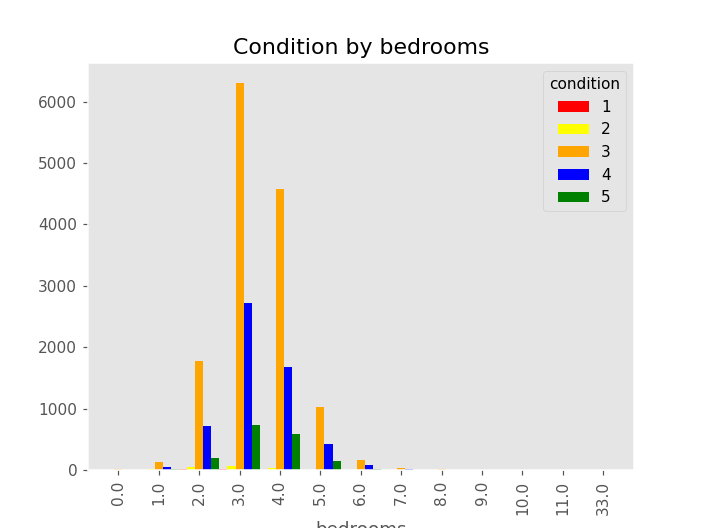

<AxesSubplot:title={'center':'Condition by bedrooms'}, xlabel='bedrooms'>

In [34]:
# Plota a tabulação cruzada
# Usamos o método plot com gráfico de barras

table = pd.crosstab(dataset['bedrooms'], dataset['condition'])
table.plot(kind='bar', width=1.0, color = ['red', 'yellow', 'orange', 'blue', 'green'], title='Condition by bedrooms', grid=False)